# Extended model of ICD

This notebook simulates the extended model of immunogenic cell death (ICD) using UPMaBoSS approach

In [1]:
import maboss
import matplotlib.pyplot as plt
import time
import seaborn as sns
plt.rcParams.update({'font.size': 16})

### Model simulations

The model is simulated with UPMaBoSS

In [2]:
sns.set_style("white")
colormap_scale = sns.light_palette("black", as_cmap=True)
colormap_ratios = sns.diverging_palette(240, 0, center='light', as_cmap=True)
def save_figure(figure, title):
    #figure.savefig("%s.png" % title, bbox_inches="tight")
    figure.savefig("%s.pdf" % title, bbox_inches="tight")

In [3]:
bnd = 'ICD_extend.bnd'
cfg = 'ICD_extend.cfg'
upp = 'ICD_extend.upp'

In [4]:
sim = maboss.load(bnd,cfg)
sim.print_cfg()

$nb_mutable = 0;
$rate_ATP_i_2 = 1/6;
$rate_ATP_i_7 = 1/6;
$rate_CALR_i = 1/4;
$rate_HMGB1_i = 1/6;
$rate_ANXA1_i = 1/4;
$rate_IFN1_i = 1/6;
$rate_CXCL10_i = 1/6;
$rate_CD80_i = 1/6;
$rate_MHC_II_i = 1/6;
$rate_IL1B_i = 1/6;
$rate_IL2_i = 1/6;
$rate_IL4_i = 1/6;
$rate_IL6_i = 1/6;
$rate_IL12_i = 1/6;
$rate_IL17_i = 1/6;
$rate_IFNg_i = 1/6;
$rate_TGFb_i = 1/6;
$rate_MHC_I_i = 1/6;
$rate_perforin = 0.0;
$pop_Tumor = 0.0;
$clonal_exp_rate = 0.05;
$growth_tumor = 0.00001;
$ChemoEffect = 0.00002;
$PerforinDeath = 1/240;
$PerforinRecycled = 6;
$degChemo = 1/(24*3);
$effectChemo = 1;
$u_aDC = 50;
$u_Th1 = 50;
$u_Th2 = 50;
$u_Th17 = 50;
$u_Treg = 50;
$u_preCTL = 50;
$u_CTL = 5/12;
$u_CD28 = 0.0;
$u_CXCR3 = 0.0;
$u_FPR1 = 0.0;
$u_IFN1_rec = 0.0;
$u_IFNg_rec = 0.0;
$d_IFNg_rec = 50;
$u_IL12_rec = 0.0;
$d_IL12_rec = 50;
$u_IL17_rec = 0.0;
$d_IL17_rec = 50;
$u_IL1B_rec = 0.0;
$u_IL2_rec = 0.0;
$u_IL4_rec = 0.0;
$d_IL4_rec = 50;
$u_IL6_rec = 0.0;
$d_IL6_rec = 50;
$u_LRP1 = 0.0;
$u_P2X7R = 0.0;
$u_P

In [5]:
WT = maboss.UpdatePopulation(sim,upp)

In [6]:
start = time.time()
WT_res = WT.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  8.59669554233551  mins


The results are plotted as a function of time

In [7]:
nodes=('Tumor','DC','aDC','cd4','cd8','Th1','Th2','Th17','Treg','preCTL','CTL','CALR_o','HMGB1_o','Perforin_o')

In [8]:
WT_table = WT_res.get_nodes_stepwise_probability_distribution(nodes)

The first events of ICD include release of CALR and activation of dendritic cells

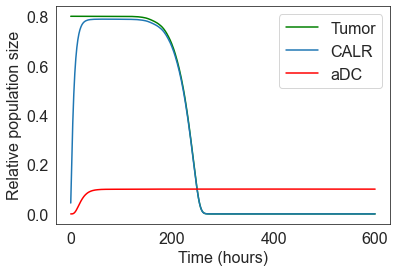

In [9]:
adc = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Tumor'],'-g',label="Tumor")
plt.plot(WT_table['PopRatio']*WT_table['CALR_o'],'-',label="CALR")
plt.plot(WT_table['PopRatio']*WT_table['aDC'],'-r',label="aDC")
plt.ylabel("Relative population size")
plt.xlabel("Time (hours)")
plt.legend()
save_figure(adc,"aDC_Tumor_CALR")

The different T cells are plotted as a function of time

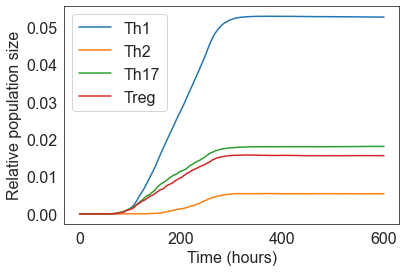

In [10]:
Tcells = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Th1'],label="Th1")
plt.plot(WT_table['PopRatio']*WT_table['Th2'],label="Th2")
plt.plot(WT_table['PopRatio']*WT_table['Th17'],label="Th17")
plt.plot(WT_table['PopRatio']*WT_table['Treg'],label="Treg")
plt.ylabel("Relative population size")
plt.xlabel("Time (hours)")
plt.legend()
save_figure(Tcells,"Tcells")

The cytotoxic T cells are plotted as a function of time and illustrate the late events of ICD

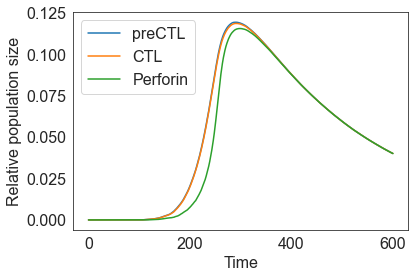

In [11]:
NTcells = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['preCTL'],label="preCTL")
plt.plot(WT_table['PopRatio']*WT_table['CTL'],label="CTL")
plt.plot(WT_table['PopRatio']*WT_table['Perforin_o'],label="Perforin")
plt.ylabel("Relative population size")
plt.xlabel("Time")
plt.legend()
save_figure(NTcells,"other_Tcells")

### Sensitivity analyses on selected model parameters

After performing a systematic sensitivity analysis on the model parameters, we selected some that show interesting results such as the timing of ICD on tumor cells.

We first run the different simulations and then visualize the results below on a single figure.

 __Higher initial DC population__  (i.e. $\text{initial pop}\cdot 1.5$)

In [12]:
HighDC_sim = maboss.load(bnd,cfg)
HighDC_sim.param['$InitDC'] = 0.15
HighDC = maboss.UpdatePopulation(HighDC_sim,upp)

In [13]:
start = time.time()
HighDC_res = HighDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  8.659872754414875  mins


In [14]:
HighDC_table = HighDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Low DC population__ (i.e. $\text{initial pop}/ 1.5$)

In [15]:
LowDC_sim = maboss.load(bnd,cfg)
LowDC_sim.param['$InitDC'] = 0.067
LowDC = maboss.UpdatePopulation(LowDC_sim,upp)

In [16]:
start = time.time()
LowDC_res = LowDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  8.645944138367971  mins


In [17]:
LowDC_table = LowDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Faster Clonal expansion__ (i.e. $\text{initial pop}\cdot 1.5$)

In [18]:
FastClonal_sim = maboss.load(bnd,cfg)
FastClonal_sim.param['$clonal_exp_rate'] = 0.075
FastClonal = maboss.UpdatePopulation(FastClonal_sim,upp)

In [19]:
start = time.time()
FastClonal_res = FastClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  8.65752683877945  mins


In [20]:
FastClonal_table = FastClonal_res.get_nodes_stepwise_probability_distribution(nodes)

__Slower Clonal expansion__ (i.e. $\text{initial pop} / 1.5$)

In [21]:
SlowClonal_sim = maboss.load(bnd,cfg)
SlowClonal_sim.param['$clonal_exp_rate'] = 0.033
SlowClonal = maboss.UpdatePopulation(SlowClonal_sim,upp)

In [22]:
start = time.time()
SlowClonal_res = SlowClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  8.454101610183717  mins


In [23]:
SlowClonal_table = SlowClonal_res.get_nodes_stepwise_probability_distribution(nodes)

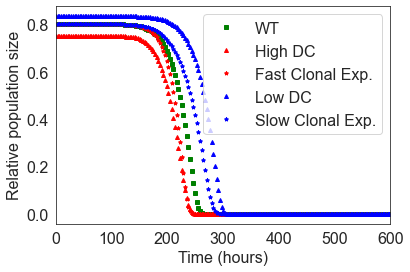

In [24]:
mutants_vs_WT = plt.figure()
plt.plot(range(0,601)[1:600:3],WT_table['PopRatio'][1:600:3]*WT_table['Tumor'][1:600:3],
         "sg",label="WT",markersize=4)
plt.plot(range(0,601)[1:600:3],HighDC_table['PopRatio'][1:600:3]*HighDC_table['Tumor'][1:600:3],
         "^r",label="High DC",markersize=4)
plt.plot(range(0,601)[1:600:3],FastClonal_table['PopRatio'][1:600:3]*FastClonal_table['Tumor'][1:600:3],
         "*r",label="Fast Clonal Exp.",markersize=4)
plt.plot(range(0,601)[1:600:3],LowDC_table['PopRatio'][1:600:3]*LowDC_table['Tumor'][1:600:3],
         "^b",label="Low DC",markersize=4)
plt.plot(range(0,601)[1:600:3],SlowClonal_table['PopRatio'][1:600:3]*SlowClonal_table['Tumor'][1:600:3],
         "*b",label="Slow Clonal Exp.",markersize=4)
plt.ylabel("Relative population size")
plt.xlabel("Time (hours)")
plt.xlim(left=0, right=600)
plt.legend()
save_figure(mutants_vs_WT,"mutants_vs_WT")

### Model modifications to mimic drug treatments

We then tested the effect of some mutations on the population dynamics to mimic the potential effect of drug treatments that would first target CD28 then IL2. These two examples show extreme cell population response.

__CD28 mutant__

In [25]:
CD28Down_sim = maboss.load(bnd,cfg)
upp = 'ICD_extend_DownCD28.upp'
CD28Down = maboss.UpdatePopulation(CD28Down_sim,upp)

In [26]:
start = time.time()
CD28Down_res = CD28Down.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  7.586369562149048  mins


In [27]:
nodes=('Tumor','DC')

In [28]:
CD28Down_table = CD28Down_res.get_nodes_stepwise_probability_distribution(nodes)

In [29]:
IL2Up_sim = maboss.load(bnd,cfg)
upp = 'ICD_extend_UpIL2_rec.upp'
IL2Up = maboss.UpdatePopulation(IL2Up_sim,upp)

In [30]:
start = time.time()
IL2Up_res = IL2Up.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  8.214225268363952  mins


In [31]:
nodes=('Tumor','DC')

In [32]:
IL2Up_table = IL2Up_res.get_nodes_stepwise_probability_distribution(nodes)

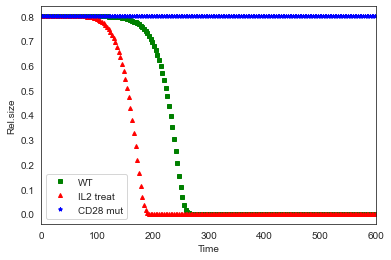

In [146]:
model_modifications = plt.figure()
plt.plot(range(0,601)[1:600:3],WT_table['PopRatio'][1:600:3]*WT_table['Tumor'][1:600:3],
         "sg",label="WT",markersize=4)
plt.plot(range(0,601)[1:600:3],IL2Up_table['PopRatio'][1:600:3]*IL2Up_table['Tumor'][1:600:3],
         "^r",label="IL2 treat",markersize=4)
plt.plot(range(0,601)[1:600:3],CD28Down_table['PopRatio'][1:600:3]*CD28Down_table['Tumor'][1:600:3],
         "*b",label="CD28 mut",markersize=4)
plt.ylabel("Relative population size")
plt.xlabel("Time (hours)")
plt.xlim(left=0, right=600)
plt.legend()
save_figure(model_modifications,"model_modification")